In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score


In [2]:
import os
os.path.exists('/Users/matthewxfz/workspace/kuangkuang/cs597/data/preprocessed_data.csv')

True

In [3]:
loc ='/Users/matthewxfz/workspace/kuangkuang/cs597/data/preprocessed_data.csv'

data = pd.read_csv(loc,index_col=0)
data.index = np.arange(0, len(data))
data = data.drop('X', axis = 1)

X = data.drop('AGE',axis = 1)
Y = data['AGE']

X_norm = (X-X.mean())/X.std()
X_norm['AGE']=Y
data_norm = X_norm
out_idx = np.where(np.abs(X_norm-X_norm.mean(axis = 0)) > (2*X_norm.std()))[0]
out_idx = np.unique(out_idx)
data_non_outlier = data_norm.drop(data_norm.index[out_idx])

data_new = data_non_outlier
X_new = data_new.drop('AGE',axis = 1)
Y_new = data_new['AGE']

datax = X_new.values
datay = Y_new.values

In [4]:
datay = datay - 13

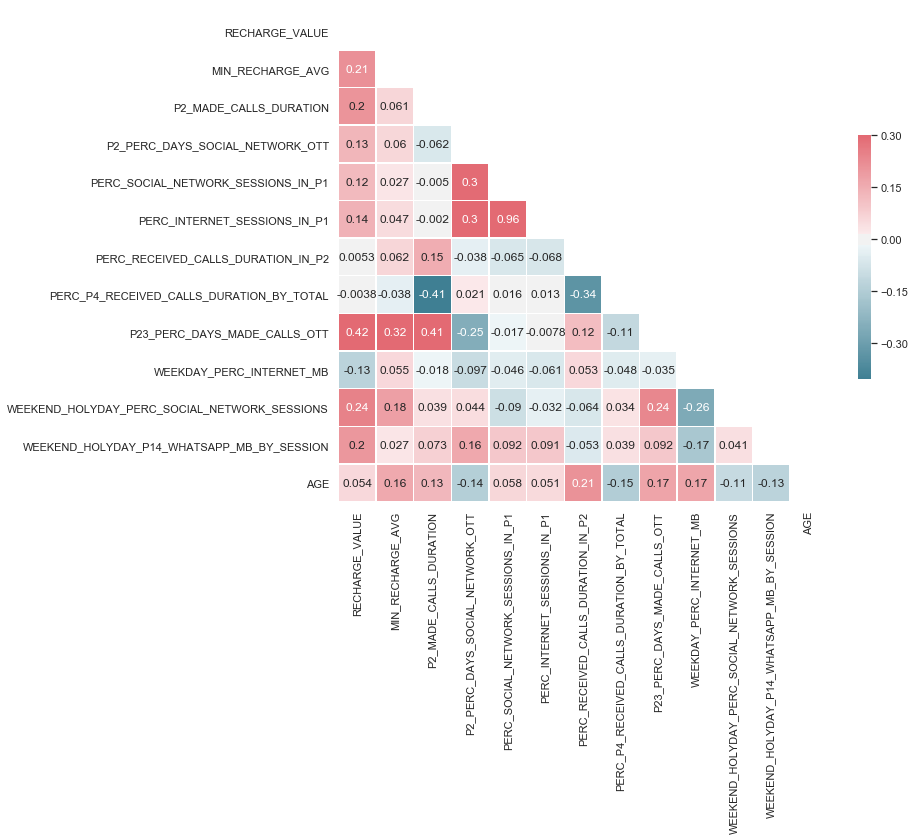

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = data_new.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [6]:
def build_model(train_data):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(12, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(36, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(108, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(48, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
#    model = keras.Sequential([
#    keras.layers.Dense(256, activation=tf.nn.relu, 
#                        input_shape=(train_data.shape[1],)),
#    keras.layers.Dense(128, activation=tf.nn.relu),
#    keras.layers.Dense(64, activation=tf.nn.relu),
#    keras.layers.Dense(8, activation=tf.nn.relu),
#    keras.layers.Dense(1)
#    ])
        
 #   optimizer = keras.optimizers.SGD(0.001)
#
 #   model.compile(loss='mse',
  #              optimizer=optimizer,
 #               metrics=['mae'])
    return model

#model = build_model(trainx)
#model.summary()

In [9]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [1000s]')
#     plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), 
#                label='Val loss')
#     plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
#                label = 'Train Loss')
#     plt.legend()
#     plt.ylim([0,20])
        
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [14]:
#trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.2, random_state = 0)


....................................................................................................

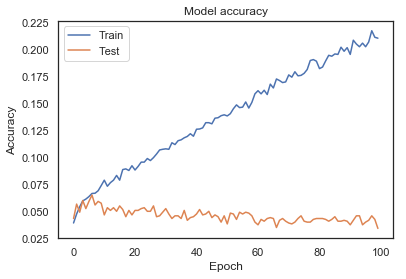

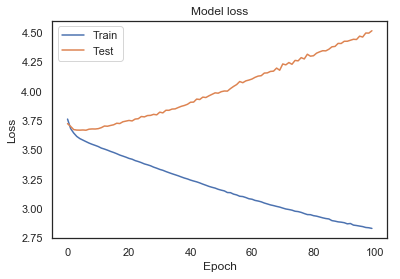

In [11]:
# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

EPOCHS = 100
result_two = []

trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.2, random_state = 1)
model = build_model(trainx)
from sklearn.metrics import accuracy_score
history = model.fit(trainx.copy(), trainy.copy(), epochs=EPOCHS,
                validation_split=0.2, verbose=0,
                callbacks=[early_stop, PrintDot()])
plot_history(history)

# y_hat = model.predict(testx).flatten() # get prediction
# # y_hat_rd = np.round(y_hat) # round prediction into int value
# precise_acc = len(np.argwhere(y_hat == testy))/len(y_hat) # compute precise accuracy(no tolerance)
# two_year_acc = len(np.argwhere(np.abs(y_hat-testy<=2)))/len(y_hat) # compute accuracy with two year tolerance
# five_year_acc = len(np.argwhere(np.absolute(y_hat_rd-testy<=5)))/len(y_hat) # compute accuracy with five year tolerance

In [21]:
y_h = model.predict(testx) # get prediction
y_hat = []
for i in range(len(y_h)):
    y_hat.append(np.argmax(y_h[i]))
#y_hat_rd = np.round(y_hat) # round prediction into int value
precise_acc = len(np.argwhere(y_hat == testy))/len(y_hat) # compute precise accuracy(no tolerance)
two_year_acc = len(np.argwhere(np.abs(y_hat-testy<=2)))/len(y_hat) # compute accuracy with two year tolerance
three_year_acc = len(np.argwhere(np.abs(y_hat-testy<=3)))/len(y_hat)
four_year_acc = len(np.argwhere(np.abs(y_hat-testy<=4)))/len(y_hat)
five_year_acc = len(np.argwhere(np.absolute(y_hat-testy<=5)))/len(y_hat) # compute accuracy with five year tolerance
print('precise accuracy: %5.3f' % precise_acc)
print('two-year-tolerance accuracy: %5.3f' % two_year_acc)
print('three-year-tolerance accuracy: %5.3f' % three_year_acc)
print('four-year-tolerance accuracy: %5.3f' % four_year_acc)
print('five-year-tolerance accuracy: %5.3f' % five_year_acc)

precise accuracy: 0.035
two-year-tolerance accuracy: 0.622
three-year-tolerance accuracy: 0.659
four-year-tolerance accuracy: 0.693
five-year-tolerance accuracy: 0.729


In [30]:
np.min(datay)


-13